In [1]:
import tensorflow as tf

In [7]:
mnist = tf.keras.datasets.mnist #28 by 28 sized images of 0-9 handwritten
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

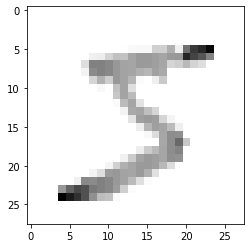

In [17]:
# Check what one image looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
#print(x_train[0])

In [9]:
# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [10]:
# train the model
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2584 - accuracy: 0.9250
Epoch 2/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1076 - accuracy: 0.9665
Epoch 3/3
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0731 - accuracy: 0.9775


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.09481776015236974 0.9704


In [12]:
model.save('test_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: test_num_reader.model\assets


In [13]:
# Load the model to make predictions
new_model = tf.keras.models.load_model('test_num_reader.model')

In [14]:
predictions = new_model.predict([x_test])

In [15]:
import numpy as np
print(np.argmax(predictions[0]))

7


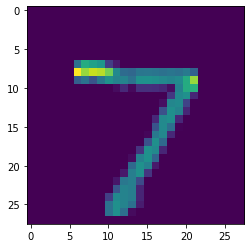

In [16]:
# It's a 7!
plt.imshow(x_test[0])
plt.show()